## Background / Motivation

The return of academic investment, or the value of a college education relative to its cost, is an increasingly important issue for students, families, and policymakers. In 2023, the value of a college education is likely to be even more closely scrutinized as students and families seek to make informed decisions about their investments in higher education. In fact, a recent study by Georgetown University found that the median ROI for a bachelor's degree in the United States is 102%, but this varies widely by major, with some majors having ROIs as high as 300%[1]. While this study only focuses on the majors and degrees, we hope to make similar conclusions regarding the schools themselves. 

Thus, as we are nearing graduation as upperclassmen in college, we are now more than ever concerned about the return on academic investment given the current economic climate. We wonder exactly what, and if there are any, characteristics of colleges that lead to higher monetary returns after four-years of university. 

## Problem statement 


Our problem is a regression problem because our response variable (Y) is the mid-career salary of graduated undergraduate students, which is a continuous variable. We are interested in using inference **and** prediction because we are identifying the relationship between multiple university predictors – Baron’s selectivity scale, student/faculty ratio, student population, and average tuition costs – and the resulting return on education (measured here by mid-career salary) in order to make a tool for the stakeholders mentioned below. For instance, we are going to attempt to identify if a university’s average tuition costs impact the students’ mid-career salary.


Because our proposal is a regression problem, we will be assessing model accuracy with the root mean squared error (RMSE). We will optimize RMSE because we want to penalize larger outliers more. For example, certain schools that are not as selective may have an exceptionally high mid-year salary in the dataset because of certain outlier high-performing individuals that skew the average – we want our model to be more sensitive to these outliers.


## Data sources

1. https://www.kaggle.com/datasets/kabhishm/top-american-colleges-2022 This dataset contains information about US colleges, including their student/faculty ratio, rank, undergraduate population, and mid-career salary. This dataset will help us understand how different variables affect average mid-career salary expectations.
2. https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay?select=tuition_cost.csv This dataset contains information about tuition and total costs of US colleges. It distinguishes between in-state and out-of-state tuition for public colleges. This dataset will help us understand how tuition affects average mid-career salary expectations. 
3. https://www.jkcf.org/wp-content/uploads/2018/06/The_Transfer_Process-2015_list_of_selective_colleges.pdf This dataset information on the selectivity of US colleges. It uses Barron’s Profile of American Colleges to put schools into three categories: “competitive”, “less competitive”, and “non-competitive”. This dataset will help us understand how selectivity affects average mid-career salary expectations.


## Stakeholders

**Parents with children graduating from high school** – they to ensure their kids are receiving an education that is worth the investment: their hope is that the higher education, the higher the lifetime earnings their children will gross. Using the information from this project will help parents make informed decisions.


**Students** – they can benefit from this project by using the information to determine which universities they want to apply to and/or what universities are worth attending.


**University administration and board members** – especially those working at the most selective schools – are interested in having a high mid-career salary association with higher tuition costs and selectivity, and lower student/faculty ratio and student population to generate revenue.


**Investors** - Similar to administration and board members, investors are similarly interested in these statistics to determine whether or not their investment will have a higher return.
The federal and state governments want to see this kind of information to inform their annual budgets and how much money to allocate to U.S. universities.



## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

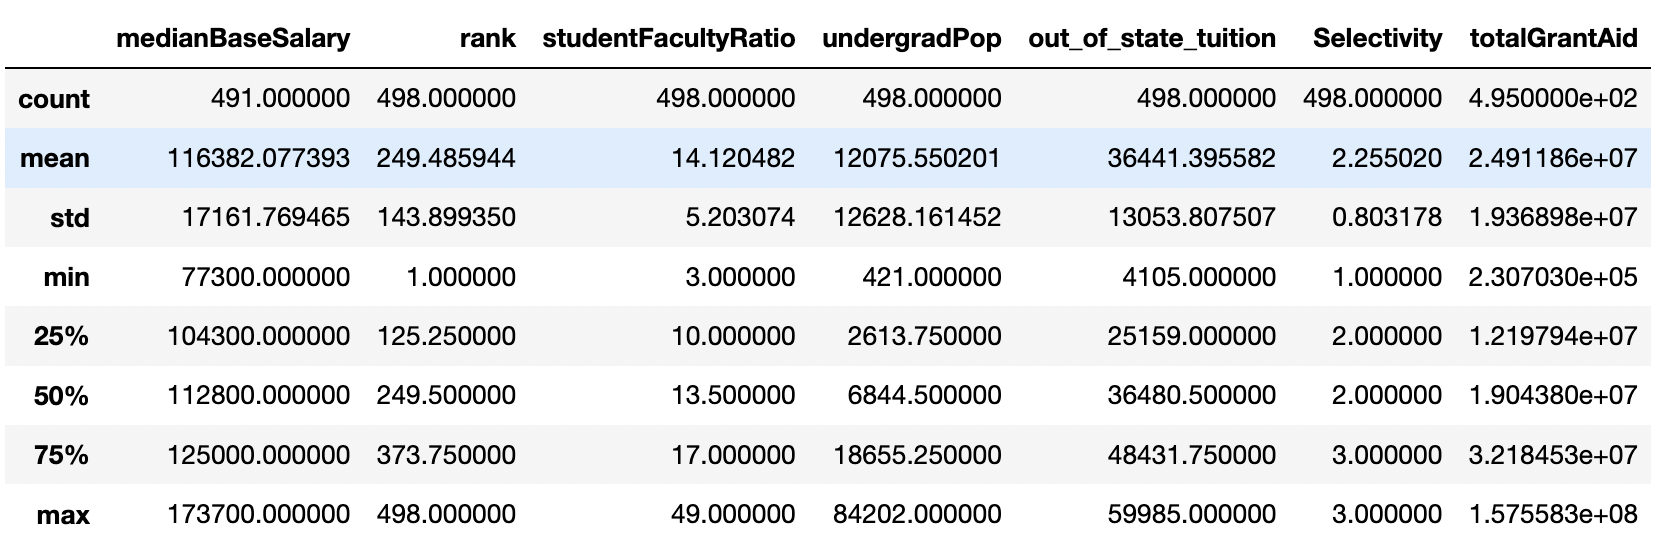

To start, we had to combine our 3 datasets. We left joined the Barrons Selectivity dataset and the Tutition dataset with the Top Colleges List because it had the most colleges in the dataset. We also had to import fuzzymatcher to help with left joining because the names of the colleges did not match exactly within the datasets (for example: UC Berkeley vs University of California, Berkleye). Fuzzymatcher takes the 2 college names and based on their similarity, creates a score. Fuzzymatcher then uses a threshold, and if that score is above the threshold, the 2 college names are merged together. Above is the distribution of the variables in the dataset. 

The dataset intitally had many columns than that in the summary statistics table above. We dropped any columns relating to the location of the University(state, longitude, latitude), and any columns that we did not deem as an important predictor for median base salary of undergraduate universities(room and board cost, degree length). |The main variables we were focused on in our analysis were medianBaseSalary, rank, studentFacultyRatio, undergradPop, out_of_state_tuition, Selectivity, and totalGrantAid. Selectivity was the only variable that was categorical with having values of 1 (most selective), 2 (selective), and 3 (least selective). 

Lastly, to prep the data for model development, we checked the null values of the variables we were interested in. As you can see below, there were only 7 numbers missing max for a variable, which we found to be a relatively small number compared to the total number of observations. We dropped all null values and then started model development.

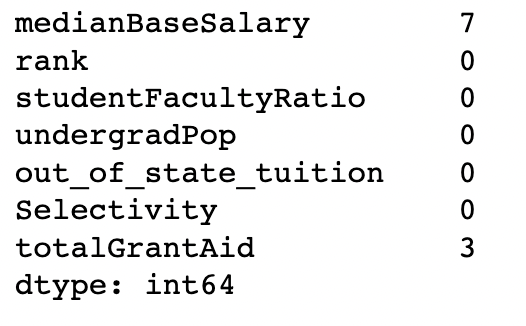

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

## Approach

We used a multiple linear regression model. We prioritized optimizing RMSE and R2 in our model. RMSE tells us the average difference between the values that are predicted by our model, and the actual values. We wanted to make sure that our model was not overfitting or underfitting. R2 tells us how much variance in the average median salary is explained by the predictor variables we selected, also known as the goodness-of-fit test. It allows us to make better inference from the training data. 


Given that our data was solely focused on colleges and their median income, it posed a challenge to divide the dataset into training and test data sets without sacrificing valuable information required to build the model. Additionally, as the dataset did not specify the time frame within which the median income was calculated for each college, predicting exact median incomes could have been inconsistent. To overcome this obstacle, one thing that we did differently was create a test dataset with 500 artificial "students" who attended 500 colleges selected at random from the original dataset. We merged the attributes and predictors of these colleges, including median income, with the test dataset to enable the availability of this information when running the model on the dataset. Lastly, to create a more precise training dataset that ensured that the students would not earn the exact median income as their respective universities, we introduced roughly $20,000 of noise for the median incomes. That way, for example, if student N went to Northwestern University with a median income of S , in the test data, they would have an income of anywhere between [S-10,000, S+10,000]. 

Our first model with no interactions worked in the sense that it was functional, however, the R^2 value was only .59. This is obviously not ideal, considering the amount of variables we had at our disposal and the potential interactions that we hadn’t yet explored. Thus, we used this first model as a basis for our exploration of the model interactions(explained more in the next section). 

Our problem did not already have solutions posted on Kaggle. The dataset did not have much information outside of the data itself, nor was there any initial EDA provided. 

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

The reliability and accuracy of the response variable, “medianBaseSalary,” leads to some limitations in our conclusions.  There are no details about how this metric was recorded, nor about the point in time these statistics were recorded after graduation; a graduate’s base salary ten years after university will be drastically different from that of a graduate only two years out.  Additionally, it seems as though this statistic fails to acknowledge job occupation as well: those who become lawyers will yield a different base salary of those who become baristas, for example. Likewise, the metric fails to consider the classification of the school and the potential impact it may have on median income. For instance, a small liberal arts institution may have different constraints regarding professions and compensation in comparison to a STEM/technology-focused institution. Consequently, a student may excel in their field at the former school, but their success may not be reflected in the median income.. Thus, “medianBaseSalary” represents a very generalized statistic for each school with a large potential margin for error: this observation is reflected in the high RMSE value found within our model.

The “outofstatetuition” variable is also questionable in its accuracy in predicting median base salary.  Depending on the type of school, the percentage of undergraduate students may be much higher than others, consequently influencing the effectiveness to which “outofstatetuition” is representative of median base salary.

The model will become statistically obsolete fairly quickly.  Because of how quickly employment salary based on occupation and inflation changes, this model will not accurately reflect the salary of graduates only a few years out of college. For example, maybe just 10 years ago, considering the everclimbing importance of technology, the landscape of the various salaries and their relationships with one another have drastically changed. With the rise of AI and related technologies, it's impossible to predict the job and salary landscape even 5 years from now!However, despite this, we believe that the infered trends and conclusions based on the observations of predictors are likely to persist.

## Conclusions and Recommendations to stakeholder(s)

We concluded several observations from our final inference model.  Collinearity was tested using VIF, predictors were tested for existing interaction terms, and the best group of predictors was found, leading to a subset that minimized the RMSE and R2 for the model.  All predictors were statistically significant – p-values were less than 0.05.  The model was tested against a test dataset, and the RSE and RMSE of the training and test data, respectively, were calculated and compared: the model was found to not overfit the data since the RSE on the training data is less than the RMSE of the test data.  The coefficients of each predictor yielded the most significant conclusions.  The “selectivity” and “undergraduate population” predictors have the largest change in median base salary, driving higher salaries for university graduates.  The intercept is inferentially insignificant because the “selectivity” predictor cannot take on a value of 0.  The “rank” predictor surprisingly has the smallest change in median base salary.

Stakeholders can greatly benefit from the model and conclusions above.  For university administration, it’s important to identify “selectivity” and undergradPop” as the most influential predictors: minimizing both values – being very selective, and maintaining a low undergraduate population – will be more effective in yielding a higher median base salary for graduates versus minimizing or maximizing other predictors.  Board members can use this information to adjust university admission to sustain an academic environment conducive to preparing students for high-paying careers.  As for parents and students, the model and its results confirm the expectation that attending top tier schools affect future financial success.  These schools, such as Northwestern, minimize “selectivity”, “undergradPop”, “studentFacultyRatio”, and “rank”, and maximize “outofstatetuition.”  An analysis of these factors can help inform college application decisions and expectations: ideally, if the money is available since tuition will be high, students and parents should apply for those top schools.  Finally, the model can help inform investment decisions made by the government and investors: if they see that a university’s graduates are achieving high mid-career salaries, they may be more likely to invest in that institution.  Following the previous observations, investing top tier colleges may be a safer option for those looking to make money.  Conversely, the government may want to invest in schools that have higher “selectivity”, “undergradPop”, “studentFacultyRatio”, and “rank”, and lower “outofstatetuition.”  Additionally, the model can be used as an overall metric of the possible return on investment.

As previously discussed in the limitations section of the report, the reliability and accuracy of the response variable, “medianBaseSalary,” and  “outofstatetuition” variable leads to some limitations in our recommendation to stakeholders.  The uncertainty in the measurement of median base salary itself – how and at what point it was recorded – combined with the variability in student population paying out of state tuition limits the validity to which stakeholders can rely on the conclusive inferences; though, this variability and uncertainty is statistically reflected and acknowledged as RMSE.

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Elton John</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Xena Valenzuela</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

There is definitely a learning curve using GitHub.  Initially, we found difficulties when pushing and pulling, especially when different copies of the jupiter notebook conflicted with each other.  Using GitHub is somewhat easier now; however, in certain cases, collaboration felt more difficult because group members had to wait on others in order to make progress, because if we were working in a similar area in the jupyter notebook on our own tasks, there would be merge conflicts when we pushed. 

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] P. Carnevale, J. Strohl, and M. Melton, "The Economic Value of College Majors." Georgetown University Center on Education and the Workforce, May 2015. Available online at: https://cew.georgetown.edu/cew-reports/valueofcollegemajors/.

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.